In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
#data = pd.read_csv('https://raw.githubusercontent.com/carlosgiongo/Apple-Act./main/full_apple.csv')
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2021, 8, 28)
data = web.DataReader('AAPL', 'yahoo', start, end)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [3]:
prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [4]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
75/75 [==============================] - 12s 92ms/step - loss: 0.0098
Epoch 2/25
75/75 [==============================] - 7s 91ms/step - loss: 0.0018
Epoch 3/25
75/75 [==============================] - 7s 91ms/step - loss: 0.0018
Epoch 4/25
75/75 [==============================] - 7s 93ms/step - loss: 0.0016
Epoch 5/25
75/75 [==============================] - 7s 91ms/step - loss: 0.0014
Epoch 6/25
75/75 [==============================] - 7s 90ms/step - loss: 0.0017
Epoch 7/25
75/75 [==============================] - 7s 91ms/step - loss: 0.0015
Epoch 8/25
75/75 [==============================] - 7s 92ms/step - loss: 0.0012
Epoch 9/25
75/75 [==============================] - 7s 93ms/step - loss: 0.0015
Epoch 10/25
75/75 [==============================] - 7s 91ms/step - loss: 0.0012
Epoch 11/25
75/75 [==============================] - 7s 92ms/step - loss: 0.0011
Epoch 12/25
75/75 [==============================] - 7s 91ms/step - loss: 0.0012
Epoch 13/25
75/75 [=================

In [10]:
#Teste de modelo
data_teste = web.DataReader('AAPL', 'yahoo', start, end)
pontos_atuais = data_teste['Close'].values
total_dataset = pd.concat((data['Close'], data_teste['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(data_teste) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

In [11]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

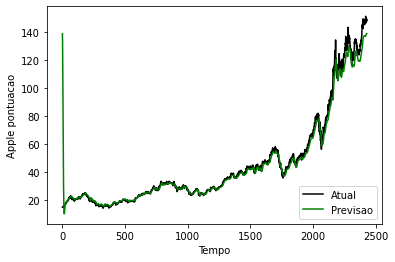

In [12]:
plt.plot(pontos_atuais, color="black", label=f"Atual")
plt.plot(predicted_prices, color='green', label=f'Previsao')
plt.title=(f"Pontos de mercado")
plt.xlabel('Tempo')
plt.ylabel(f'Apple pontuacao')
plt.legend()
plt.show()

In [13]:
#Previsao do futuro (1 dia)
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f'Previsao: {prediction}')

Previsao: [[138.6633]]
